## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [20]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [21]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
#print(len(data))
data[0:100]

'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [22]:
# 找到換行符號，用該符號做字串分割後，把它拿掉

data = data.split("\n")
data = ("\t".join(data)).split("\t")
img = []
for i in data:
    if ("http" in i):
        img.append(i)
img

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg',
 'http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg',
 'http://www.dierentuin.nl/images/jongengiraffe.jpg',
 'http://farm4.static.flickr.com/3279/3118

## 將 txt 轉成 pandas dataframe

In [36]:
import pandas as pd
df = pd.DataFrame(img,columns=["Img"])
df.head()

,Img
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


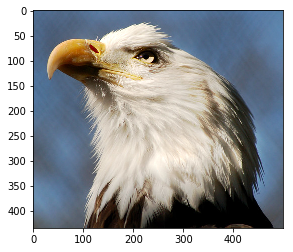

In [37]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.Img[0]
print(first_link)
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [38]:
def img2arr_fromURLs(url_list, resize = False):
    response = requests.get(url_list)
    img = Image.open(BytesIO(response.content))
    return img

4


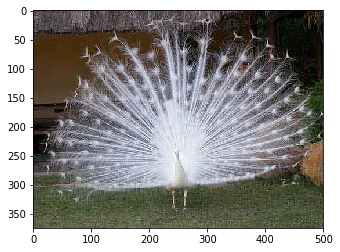

In [77]:
all_data = []
for i in df.Img[:4].values:
    img = img2arr_fromURLs(i)
    all_data.append(img)
    plt.imshow(img)

print(len(all_data))



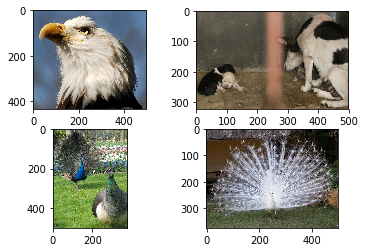

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.imshow(all_data[0])
ax2.imshow(all_data[1])
ax3.imshow(all_data[2])
ax4.imshow(all_data[3])